In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, poisson
from math import exp

离散型随机变量和连续型随机变量最大的区别在于二者在概率计算上是不同的：

- 对于离散型随机变量，概率函数 $f(x)$ 给出了随机变量 $x$ 取某个特定值 $x = n$ 时的概率，也就是，每个随机变量点 $x$ 的概率 $f(x)$ 是固定的，我们可以通过代入随机变量的值 $x$ 获取该点的具体概率值。
- 对于连续型随机变量，与概率函数相对应的是**概率密度**，也记作 $f(x)$；通过给定区间上曲线 $f(x)$ 下的**面积**给出连续型随机变量在该区间取值的概率。连续型随机变量，每个随机变量点 $x$ 的概率 $f(x)$ 都是 0，我们只能通过求面积（积分）来计算概率。

注意，连续型随机变量的概率函数 $f(x)$ 的值，不是其发生概率，曲线 $f(x)$ 下的**面积**占比，才是发生概率。

# 均匀概率分布

均匀概率分布是一种连续型概率分布，随机变量在等长度的区间上取值的概率相同。均匀概率密度函数为：

$$f(x)=
\begin{cases}
\displaystyle \frac{1}{b-a}& {a \leq x \leq b}\\
\displaystyle 0& {其他}
\end{cases}$$

令随机变量 $x$ 表示某航班从芝加哥飞往纽约的飞行时间，假定飞行时间可以取区间 $[120, 140]$ 内的任意值，

即：飞机可能花费 120 - 140 分钟完成飞行，期间内的每一个时刻，飞机都有可能到达，则概率密度函数为：

$$f(x)=
\begin{cases}
\displaystyle \frac{1}{140-120} = \frac{1}{20}& {120 \leq x \leq 140}\\
\displaystyle 0& {其他}
\end{cases}$$

### 连续型均匀概率分布
对于上面介绍的连续型均匀概率分布，
数学期望为：$$\displaystyle E(x) = \frac {(a+b)}{2}$$
方差为：$$\displaystyle Var(x) = \frac {(b-a)^2}{12}$$

飞行时间的数学期望为：$$\displaystyle E(x) = \frac {(120+140)}{2} = 130$$
飞行时间的方差为：$$\displaystyle Var(x) = \frac {(140-120)^2}{12} = 33.33$$
飞行时间的标准差为：$$\displaystyle \sigma(x) = \sqrt{\frac {(140-120)^2}{12}} = 5.77$$

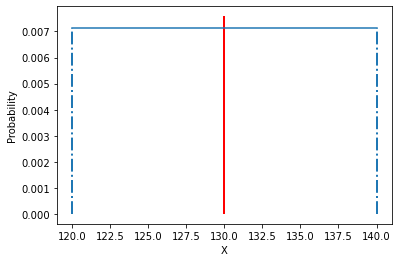

In [114]:
a,b = 120, 140
size=2

x = np.linspace(a, b, size)

continuous_uniform_distribution = uniform(loc=a, scale=b)
continuous_uniform_pdf = continuous_uniform_distribution.pdf(x)

plt.vlines(a, 0, continuous_uniform_pdf.max(), linestyles='-.', lw=2)
plt.vlines(b, 0, continuous_uniform_pdf.max(), linestyles='-.', lw=2)
plt.vlines((a+b)/2, 0, continuous_uniform_pdf.max()*1.0618, linestyles='-', lw=2, edgecolor='red')

plt.plot(x, continuous_uniform_pdf)

plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

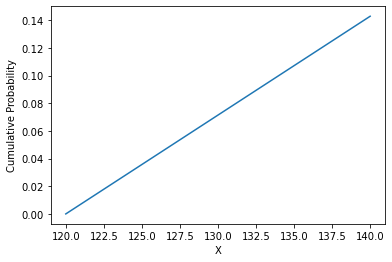

In [115]:
continuous_uniform_cdf = continuous_uniform_distribution.cdf(x)
plt.plot(x, continuous_uniform_cdf)
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.show()

# 正态概率分布

正态概率分布：是描述连续型随机变量的最重要的一种概率分布，其概率密度函数呈钟形，由均值 $\mu$ 和标准差 $\sigma$ 确定:

$$ f(x) = \frac {1}{\sqrt{2\pi}\sigma} \displaystyle e^{-(x-u)^2/2\sigma^2}$$

其中
- $\mu$ 为均值、$\sigma$ 为标准差、$\pi$ 为 3.14159、$e$ 为 2.71828

## 正态分布特征
1. 正态分布族中的每个分布因均值 $u$ 和标准差 $\sigma$ 这两个参数的不同而不同
2. 正态曲线的最高点在均值处达到，均值还是分布的中位数和众数
3. 分布的均值可以是任意数据：负数、零或正数
4. 正态分布永远是对称的
5. 标准差决定曲线的宽度和平坦程度
6. 正态随机变量的概率由正态曲线下的面积给出

下面是随机变量在一些常用区间内取值的百分比
- 正态随机变量有 68.3%的值在均值加减一个标准差的范围内
- 正态随机变量有 95.4%的值在均值加减两个标准差的范围内
- 正态随机变量有 99.7%的值在均值加减三个标准差的范围内

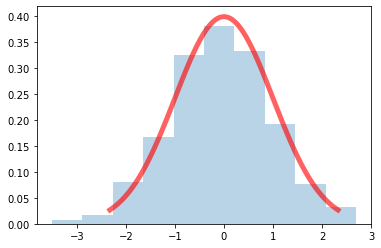

In [116]:
from scipy.stats import norm, binom, binomtest
import matplotlib.pyplot as plt

mean, var = norm.stats()

r = norm.rvs(size=1000)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

plt.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.618, label='norm pdf')
#plt.plot(x, norm.pdf(x), 'k-', lw=2, label='frozen pdf')

plt.hist(r, density=True, histtype='stepfilled', alpha=0.309)
plt.show()

## 标准正态概率分布

随机变量服从均值 0  并且标准差为 1 的正态分布，则称该随机变量服从标准正态概率分布

标准正态密度函数：$$f(z) = \frac {1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}$$

## 计算正态分布的概率

转化为标准正态随机变量：

$$\displaystyle z = \frac {(x-\mu)}{\sigma}$$

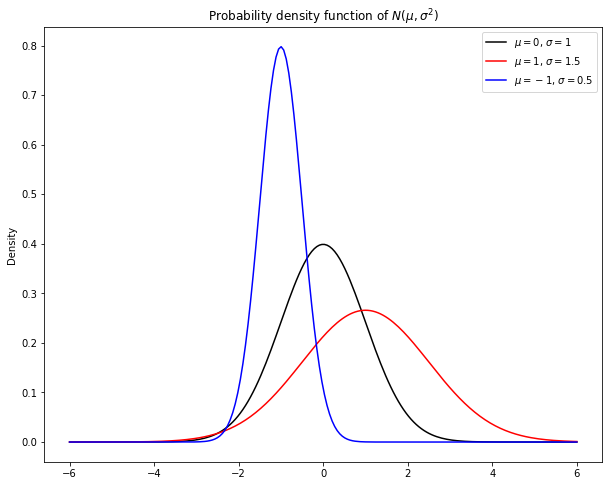

In [1]:
# Calculate the probability density function for values of x in [-6;6]
x = np.linspace(start = -6, stop = 6, num = 200)
#
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, norm.pdf(x, loc = 0, scale = 1), color = "black", 
         label = "$\\mu=0$, $\sigma =1$")
_ = plt.plot(x, norm.pdf(x, loc = 1, scale = 1.5), color = "red", 
         label = "$\\mu=1$, $\sigma =1.5$")
_ = plt.plot(x, norm.pdf(x, loc = -1, scale = 0.5), color = "blue", 
         label = "$\\mu=-1$, $\sigma =0.5$")
_ = plt.title("Probability density function of $N(\\mu, \\sigma^2)$")
_ = plt.ylabel("Density")
_ = plt.legend()
plt.show()

# 二项概率的近似分布

之前我们学习了离散型二项分布。二项试验由一系列 $n$ 个相同的独立试验组成，每个试验有两种可能结果——成功或失败。

所有的试验中成功的概率都是相同的，用 $p$ 来表示。

二项分布中随机变量是 $n$ 次试验中成功的次数，在 $n$ 次试验中有次成功的概率是我们关心的概率问题。

当试验次数很大时，笔算或用计算器求解二项概率函数都是很困难的。

在 $np \geq 5$ 和 $n(1-p) \geq 5$ 的情况下，正态分布是对二项分布的一个简便易行的近似。

当使用正态分布近似二项分布时，正态曲线中取 $\mu=np$ 和 $\sigma = \sqrt{np(1-p)}$

例如：发票出错的概率是 10%，选取 100 张发票组成一个样本，恰好有 12 张发票出错的概率是多少？

均值

$$\mu = np = 100 \times 0.1 = 10$$

标准差

$$\sigma = \sqrt{np(1-p)} = \sqrt{100 \times 0.1 \times (1-0.1)} = 3$$

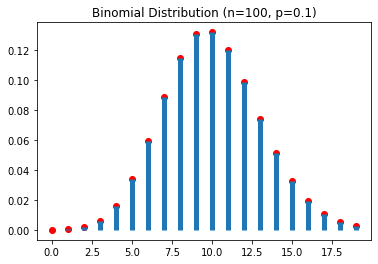

0.09878801235167885
0.5030177615152569
Results: mean=10.0, SD=3.0, Prob=9.88%


In [117]:
n, p, k = 100, 0.1, 12

# 随机生成数组
x = np.arange(0, binom.ppf(0.999, n, p))

binomial_pmf = binom.pmf(x, n, p)
plt.plot(x, binomial_pmf, 'ro')
plt.vlines(x, 0, binomial_pmf, linestyles='-', lw=5)
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

print(binomial_pmf[k])
print(binomtest(k, n, p).pvalue)

# 获取统计量
mean, var = binom.stats(n, p)
print(f"Results: mean={mean}, SD={var**0.5}, Prob={round(binomial_pmf[k]*100,2)}%")

通过上面的计算结果，恰好有 12 张发票出错的概率大概是 9.88%（是挺高的一个概率了）。

已知 $\mu = 10$，$\sigma = 3$，我们可以得到一个正态分布。

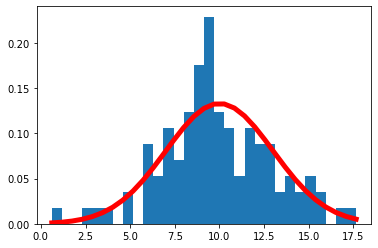

In [118]:
mu, sigma = 10, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2) ),linewidth=5, color='r')
plt.show()

对于连续型概率分布，概率是通过计算概率密度函数下方的面积得出的。因此，随机变量取任意单个值的概率为 0。

也就是说，对于连续型概率分布而言，$P(x=12) = 0$

因为我们是在用一个连续分布来近似一个离散分布，所以我们在这里引入连续性修正因子：

> 当用连续型正态概率分布来近似离散型二项概率分布时  从 $x$ 中加上或减去的值 0.5

从而离散型二项分布的概率 $P(x=12)$ 可用连续型正态分布概率 $P(11.5 \leq x \leq 12.5)$ 来近似。

当 $x = 12.5$ 时，$\displaystyle z = \frac{(x-\mu)}{\sigma} = \frac{(12.5-10)}{3} = 0.83$

当 $x = 11.5$ 时，$\displaystyle z = \frac{(x-\mu)}{\sigma} = \frac{(11.5-10)}{3} = 0.5$

查表可得，$z = 0.83$ 时，概率密度函数面积为 0.7967；$z = 0.5$ 时，概率密度函数面积为 0.6915

可得 $P(11.5 \leq x \leq 12.5) = 0.7967 - 0.6915 = 0.1052$

In [123]:
estimated = norm(loc = mean, scale = sigma).pdf(k)
correction = norm(loc = mean, scale = sigma).cdf(k+0.5) - norm(loc = mean, scale = sigma).cdf(k-0.5)
print(f"Results: Point Estimated={round(estimated*100,2)}%, Continuity Correction={round(correction*100,2)}%")

Results: Point Estimated=10.65%, Continuity Correction=10.62%


如果我们想知道，不多于 13 张发票出错的概率是多少？

In [124]:
results = norm(loc = mean, scale = sigma).cdf(13.5)
print(f"Results: {round(results*100,2)}%")

Results: 87.83%


# （还需要优化）指数概率分布

用于描述诸如下列情况的随机变量：

- 到达某洗车处的两辆车的时间间隔
- 装载一辆卡车所需时间
- 告诉公路上两起重大事故发生地之间的距离

指数分布的性质：
- 分布的均值和标准差相等。
- 指数分布是右偏的，偏度为 2


指数概率密度函数：

$$\displaystyle f(x) = \frac {1}{\mu}e^{-\frac{x}{\mu}}, x\geq 0$$

其中：$\mu$ 为期望值或者均值

指数分布累积概率：

$$P(x \leq x_0) = 1 - e^{-\frac{x_0}{\mu}}$$

假定在码头装载一辆卡车所需时间 $x$ 服从指数分布。

如果装车时间的均值或平均所需时间是 15 分钟，则 $x$ 的概率密度函数是：

$$\displaystyle f(x) = \frac {1}{15}e^{-\frac{x}{15}}$$

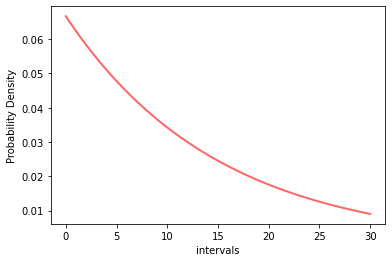

In [225]:
mu = 15
x = np.linspace(0, 30, 100)
expon_pdf = expon.pdf(x, scale = mu)

plt.plot(x, expon_pdf , '-', lw=2, alpha=0.6, label='expon pdf' , color = 'r')
plt.xlabel('intervals')
plt.ylabel('Probability Density')
plt.show()

# 暂时只求出来了分布，不知道怎么求 cdf

现在我们想知道，装载一辆卡车花费在 6-18 分钟的概率 $P(6 \leq x \leq 18)$ 为

$$P(x \leq 6) = 1 - e^{-\frac{6}{15}} = 0.3297$$

$$P(x \leq 18) = 1 - e^{-\frac{18}{15}} = 0.6988$$

$$P(6 \leq x \leq 18) = 0.6988 - 0.3297 = 0.3691$$

## （还需要优化）[Exponential Distribution](https://radzion.com/blog/probability/exponential)
已知某披萨饼店平均每个小时都会收到 20 份订单，我们现在想要知道过去 2 分钟内，披萨饼店刚好收到 1 份订单的概率：

probability that event will occur in just 2 minutes: 51.34%


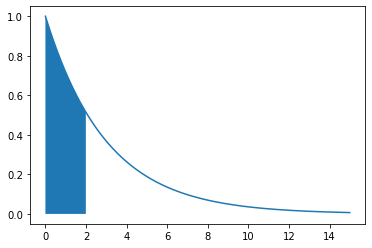

In [220]:
def probability(average, period):
    return exp(-average * period)

average = 20/60
period = 2
info_str = 'probability that event will occur in just {0} minutes: {1}%'
print(info_str.format(period, round(probability(average, period)*100,2)))

step = 0.01
whole_x = np.arange(0, 15, step)
whole_y = [probability(average, x) for x in whole_x]

needed_x = np.arange(0, 2, step)
needed_y = whole_y[:len(needed_x)]

plt.plot(whole_x, whole_y)
plt.fill_between(needed_x, needed_y)

plt.show()

## 泊松分布与指数分布的关系

泊松分布：是一种离散型概率分布，研究一个事件在一特定时间段或空间中，事件发生的次数，概率函数是：

$$f(x) = \frac{\mu^x e^{-\mu}}{x!}$$

- $f(x)$ 为事件在一个区间发生 $x$ 次的概率
- $\mu$ 为事件在一个区间发生次数的数学期望或均值
- 自然常数 $e=2.71828$

连续型指数分布与离散型泊松分布是相互联系的。

- 泊松分布描述了每一区间中事件发生的**次数**
- 指数分布描述了事件发生的**时间间隔长度**

下面我们用一个例子来描述这个两个分布的关系：

假定在一个小时当中，到达某一洗车店的汽车数可以用泊松分布描述，其均值为每小时 10 辆。

泊松概率函数给出了每小时有 $x$ 辆汽车到达的概率：

$$f(x) = \frac{10^x e^{-10}}{x!}$$

假设单位时间内，公交车平均会来 10 趟，分布概率函数为：

$$f(x) = \frac {10^x \times e^{-10}}{x!}$$

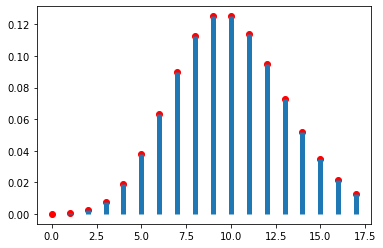

In [207]:
mu = 10
# 左边的区间需要取 0 ，否则会影响后面的统计量计算
x = np.arange(0, poisson.ppf(0.99, mu))

poisson_pmf = poisson.pmf(x, mu)

plt.plot(x, poisson_pmf, 'ro')
plt.vlines(x, 0, poisson_pmf, linestyles='-', lw=5, label='frozen pmf')
plt.show()

由于车辆到达的平均数是每小时 10 辆，则两车到达的时间间隔的均值为：

$$\frac{1 小时}{10 辆车} = 0.1 小时/辆$$

描述两车到达的时间间隔的对应分布是指数分布，其均值 $\mu = 0.1 小时/辆$，指数概率密度函数为：

$$\displaystyle f(x) = \frac{1}{0.1}e^{-\frac{x}{0.1}} = 10e^{-10x}$$

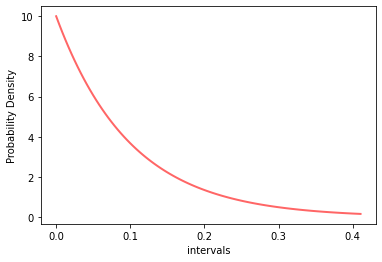

In [217]:
mu = 0.1
x = np.linspace(0,  expon.pdf(0.99, mu), 100)
expon_pdf = expon.pdf(x, scale=mu)

plt.plot(x, expon_pdf , '-', lw=2, alpha=0.6, label='expon pdf' , color = 'r')
plt.xlabel('intervals')
plt.ylabel('Probability Density')
plt.show()

# Weibull 分布

